In [20]:
import pandas as pd
import re
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [21]:
df = pd.read_csv('data/산불데이터에코드매핑+좌표.csv')


In [22]:
# 위도/경도 추출 함수
def extract_lat_lon(coord_str):
    match = re.search(r"POINT\s*\(([-\d\.]+)\s+([-\d\.]+)\)", str(coord_str))
    if match:
        lon = float(match.group(1))
        lat = float(match.group(2))
        return pd.Series([lat, lon])
    return pd.Series([None, None])


In [23]:
# 좌표 컬럼 생성
df[['lat', 'lon']] = df['REP_COORD'].apply(extract_lat_lon)


In [24]:
# 결측치 제거, 복사
df_clean = df.dropna(subset=['lat', 'lon']).copy()


In [25]:
# KMeans 클러스터링 (k=31 (헬기 총 대수))
coords = df_clean[['lat', 'lon']]
k = 31
kmeans = KMeans(n_clusters=k, random_state=42)
df_clean['cluster'] = kmeans.fit_predict(coords)
centers = kmeans.cluster_centers_


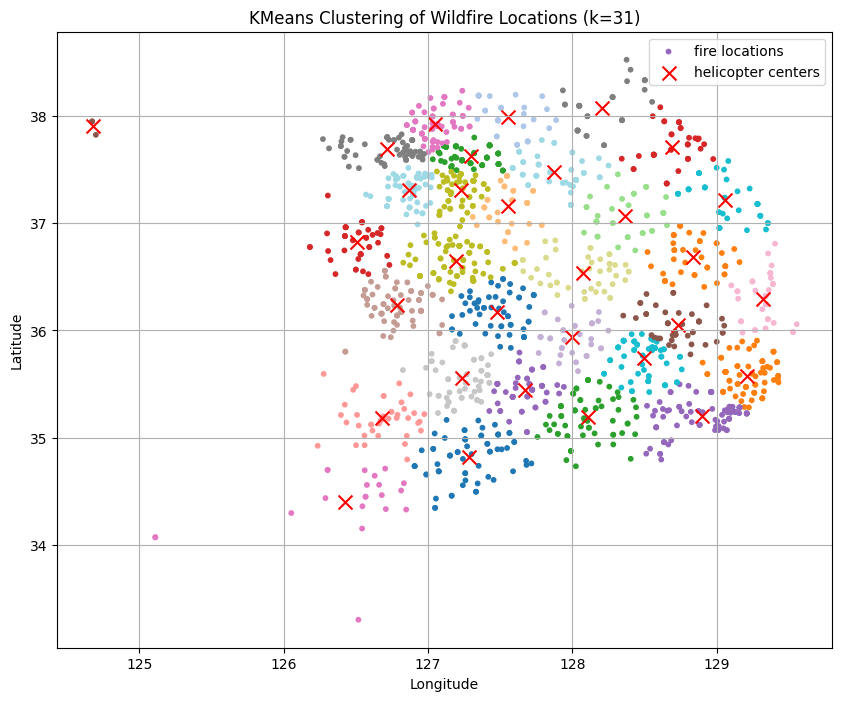

In [26]:
# 시각화
plt.figure(figsize=(10, 8))
plt.scatter(df_clean['lon'], df_clean['lat'], c=df_clean['cluster'], cmap='tab20', s=10, label='fire locations')
plt.scatter(centers[:, 1], centers[:, 0], c='red', marker='x', s=100, label='helicopter centers')
plt.title('KMeans Clustering of Wildfire Locations (k=31)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid(True)
plt.show()


In [27]:

# KMeans 클러스터링 (k=16 (헬기 보유 기관 수(중앙119 제외)))
coords = df_clean[['lat', 'lon']]
k = 16
kmeans = KMeans(n_clusters=k, random_state=42)
df_clean['cluster'] = kmeans.fit_predict(coords)
centers = kmeans.cluster_centers_


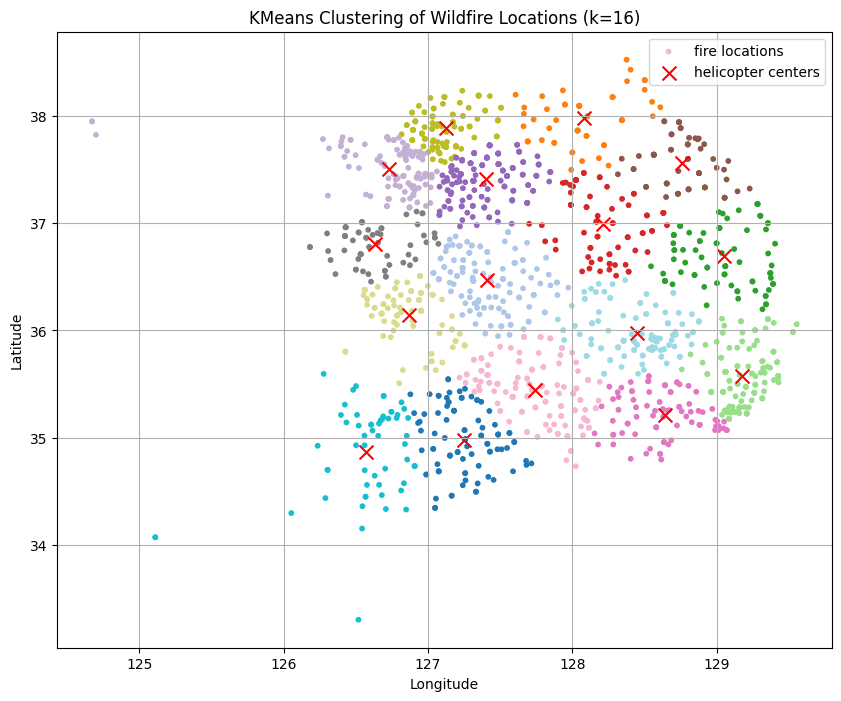

In [28]:
# 시각화
plt.figure(figsize=(10, 8))
plt.scatter(df_clean['lon'], df_clean['lat'], c=df_clean['cluster'], cmap='tab20', s=10, label='fire locations')
plt.scatter(centers[:, 1], centers[:, 0], c='red', marker='x', s=100, label='helicopter centers')
plt.title('KMeans Clustering of Wildfire Locations (k=16)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid(True)
plt.show()
